In [ ]:
!pip install scikeras


In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test)=mnist.load_data()

print("Size of Train Data's {}".format(x_train.shape))
print("Size of Test Data's {}".format(x_test.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Size of Train Data's (60000, 28, 28)
Size of Test Data's (10000, 28, 28)


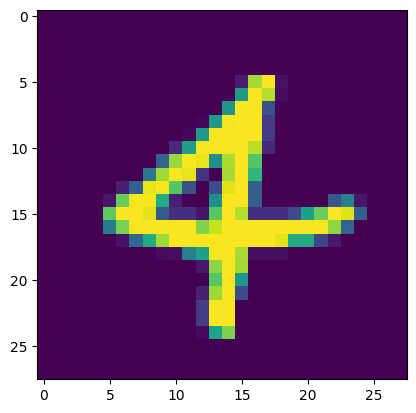

Label 4


In [ ]:
plt.imshow(x_train[150])
plt.show()
print("Label {}".format(y_train[150]))

In [ ]:
for row in x_train[150]:
  for i in row:
    print("%3s"%i, end="")
  print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19221254 11  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0139253227  8  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0135254253 63  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  4138252254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  3138253253254253 44  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 31144253253253254230 29  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 80216253247127224254187  0  0  0  0  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train=x_train.astype("float32")/255 #normalizasyon icin 255e böldük bu sayede 0-1 aralıgına düştü değerler
x_test=x_test.astype("float32")/255

x_train.dtype

dtype('float32')

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
print(y_train[10])

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

print(y_train[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
 x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.2, random_state=0)
 x_val

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

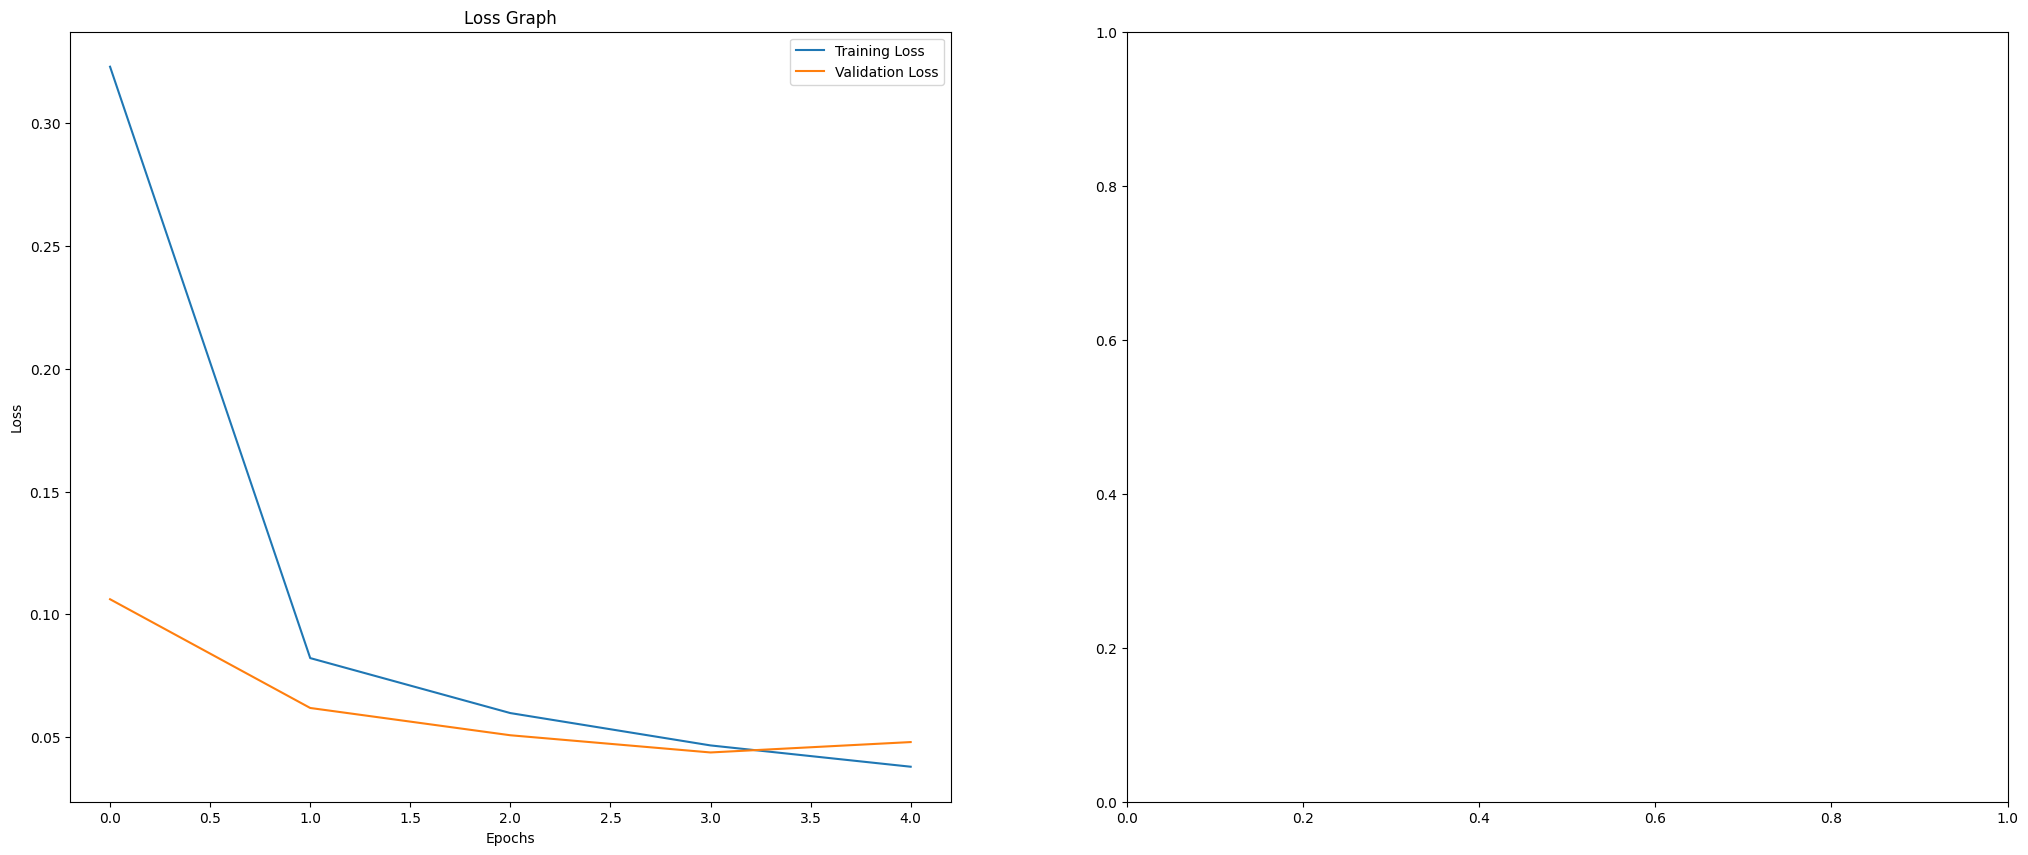

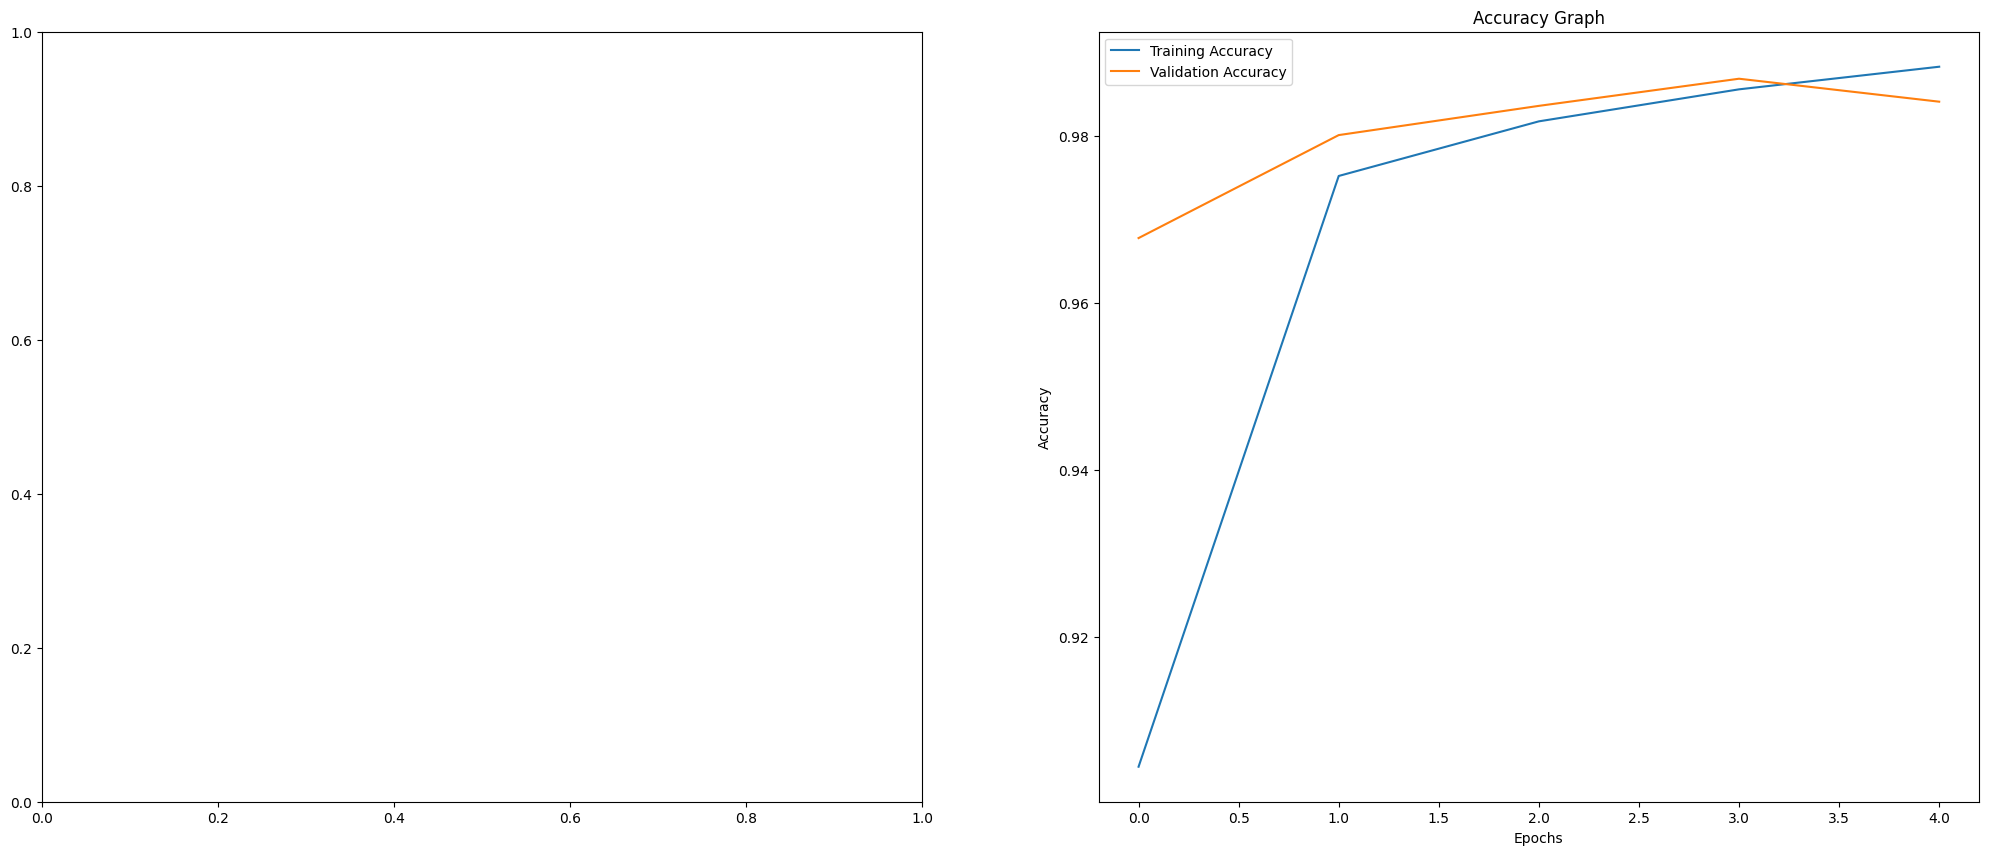

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
output=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=128, verbose=0)


fig,ax=plt.subplots(1,2, figsize=(25,10))
ax[0].plot(output.history["loss"], label="Training Loss")
ax[0].plot(output.history["val_loss"], label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()



fig,ax=plt.subplots(1,2, figsize=(25,10))
ax[1].plot(output.history["accuracy"], label="Training Accuracy")
ax[1].plot(output.history["val_accuracy"], label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()


In [ ]:
def modelkur(filtre=32, kernel=3, conv_layer=3, dense_layer=2, units=32, learning_rate=0.01, dropout_rate=0.2):
  model=Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))

  for i in range(conv_layer):
    model.add(Conv2D(filters=filtre, kernel_size=(kernel, kernel), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2,2), padding="same"))

  model.add(Flatten())
  model.add(Dense(32, activation="relu"))

  for j in range(dense_layer):
    model.add(Dense(units, activation="relu"))
    model.add(Dropout(dropout_rate))

  model.add(Dense(10, activation="softmax"))
  model.compile(optimizer=Adam(learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])

  return model





parametreler={
    "model__filtre":[32,64],
    "model__kernel":[3,5],
    "model__conv_layer":[3,4],
    "model__dense_layer":[2,3],
    "model__units":[32,64],
    "model__learning_rate":[0.001, 0.01],
    "model__dropout_rate":[0.0, 0.02],
    "epochs":[20,30]
}




sınıf=KerasClassifier(model=modelkur, verbose=0)
grid=GridSearchCV(estimator=sınıf, param_grid=parametreler, cv=3)
gridsonuc=grid.fit(x_train, y_train)
bestparam=gridsonuc.best_params_

bestmodel=modelkur(filtre=bestparam["model__filtre"], kernel=bestparam["model__kernel"], conv_layer=bestparam["model__conv_layer"],
                   dense_layer=bestparam["model__dense_layer"], units=bestparam["model__units"], learning_rate=bestparam["model__learning_rate"],
                   dropout_rate=bestparam["model__dropout_rate"])



output=bestmodel.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=bestparam["epochs"], batch_size=128, verbose=0)
